In [1]:
# data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# random forest regressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score
import math

# grid search
from sklearn.model_selection import GridSearchCV

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.DataFrame()

train_data['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/hysteresis_all_scaled_train.csv')['total']
train_data['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_train.csv')['id']
train_data['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_train.csv')['iq']
train_data['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/joule_all_scaled_train.csv')['total']
train_data['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/speed_all_scaled_train.csv')['N']
train_data['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d1']
train_data['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d2']
train_data['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['d3']
train_data['r1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['r1']
train_data['t1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_train.csv')['t1']

In [3]:
test_data = pd.DataFrame()

test_data['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/hysteresis_all_scaled_test.csv')['total']
test_data['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_test.csv')['id']
test_data['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/idiq_all_scaled_test.csv')['iq']
test_data['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/joule_all_scaled_test.csv')['total']
test_data['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/speed_all_scaled_test.csv')['N']
test_data['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d1']
test_data['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d2']
test_data['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['d3']
test_data['r1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['r1']
test_data['t1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/V/xgeom_all_scaled_test.csv')['t1']

In [4]:
def combinedHist (name, y_test, prediction, binss = 100):
    fig = plt.figure(figsize = (6, 6))
    grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.4)

    main_ax = fig.add_subplot(grid[:-1, 1:])

    y_hist = fig.add_subplot(grid[:-1, 0],
                            xticklabels = [],
                            sharey = main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:],
                            yticklabels = [],
                            sharex = main_ax)

    main_ax.hist2d(y_test, prediction,
                bins = binss, cmap = 'Blues')

    x_hist.hist(y_test, histtype = 'stepfilled', bins = binss,
                orientation = 'vertical', color = 'green', alpha = 0.3)
    x_hist.invert_yaxis()

    y_hist.hist(prediction, histtype = 'stepfilled', bins = binss,
                orientation = 'horizontal', color = 'green', alpha = 0.3)
    y_hist.invert_xaxis()

    fig.suptitle("{} - Test and Prediction Comparison".format(name), size = 18)

In [5]:
def hist2d (name, y_test, prediction, binss = 100):
    plt.hist2d(y_test, prediction, bins = binss)

    plt.title('{} - y_test and prediction'.format(name))

    plt.colorbar()

    plt.xlabel('y_test')
    plt.ylabel('prediction')

In [6]:
variable = 'hysteresis'

columns = ['hysteresis', 'joule']

X_train = train_data.drop(columns = columns)
y_train = train_data[variable]

X_test = test_data.drop(columns = columns)
y_test = test_data[variable]

## Predictions Without Grid Search

In [7]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
y_pred_bad = model.predict(X_test)

Learning rate set to 0.067551
0:	learn: 0.9396119	total: 58.4ms	remaining: 58.3s
1:	learn: 0.8863375	total: 60.3ms	remaining: 30.1s
2:	learn: 0.8369612	total: 62.5ms	remaining: 20.8s
3:	learn: 0.7895671	total: 65.3ms	remaining: 16.3s
4:	learn: 0.7456251	total: 67.1ms	remaining: 13.4s
5:	learn: 0.7043522	total: 69ms	remaining: 11.4s
6:	learn: 0.6669092	total: 70.9ms	remaining: 10.1s
7:	learn: 0.6306972	total: 73ms	remaining: 9.06s
8:	learn: 0.5967806	total: 74.8ms	remaining: 8.24s
9:	learn: 0.5657861	total: 76.6ms	remaining: 7.59s
10:	learn: 0.5361354	total: 78.5ms	remaining: 7.06s
11:	learn: 0.5085974	total: 80.3ms	remaining: 6.61s
12:	learn: 0.4837414	total: 82.9ms	remaining: 6.29s
13:	learn: 0.4602037	total: 87ms	remaining: 6.13s
14:	learn: 0.4387974	total: 88.7ms	remaining: 5.83s
15:	learn: 0.4186058	total: 90.6ms	remaining: 5.57s
16:	learn: 0.3991830	total: 92.4ms	remaining: 5.34s
17:	learn: 0.3815105	total: 94.3ms	remaining: 5.14s
18:	learn: 0.3645794	total: 96.8ms	remaining: 5s
1

In [8]:
print(f"Coefficient of determination: {r2_score(y_test, y_pred_bad)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_bad)}")
print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred_bad)}")

Coefficient of determination: 0.9982576275708201
Mean squared error: 0.0017699580361054637
Mean absolute percentage error: 0.19069959730586777


(-2.0, 3.5)

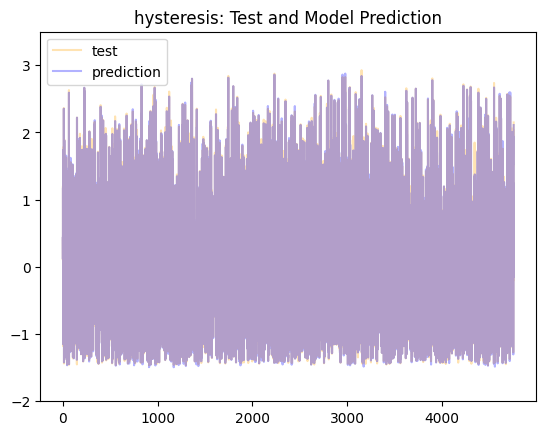

In [9]:
plt.plot(y_test, alpha = 0.3, color = 'orange', label = 'test')
plt.plot(y_pred_bad, alpha = 0.3, color = 'blue', label = 'prediction')
plt.legend()
plt.title(f"{variable}: Test and Model Prediction")
plt.ylim(-2, 3.5)

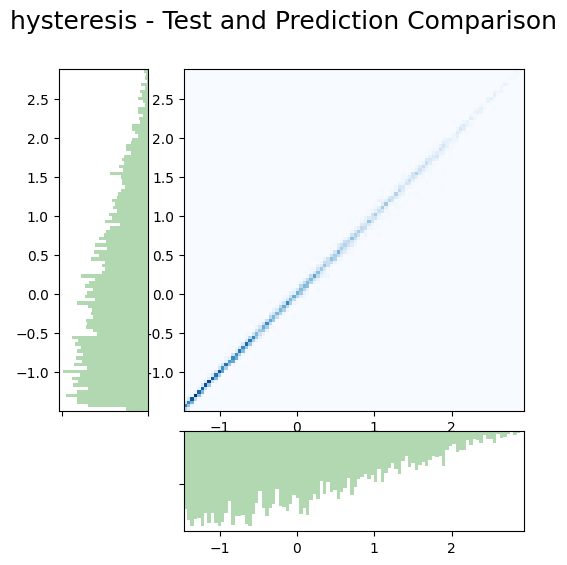

In [12]:
combinedHist(variable, y_test, y_pred_bad)

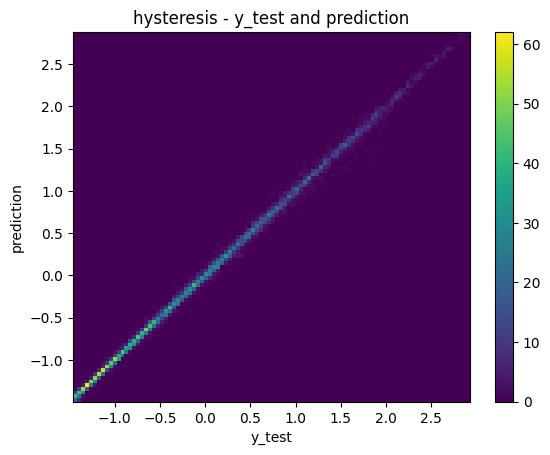

In [14]:
hist2d(variable, y_test, y_pred_bad)

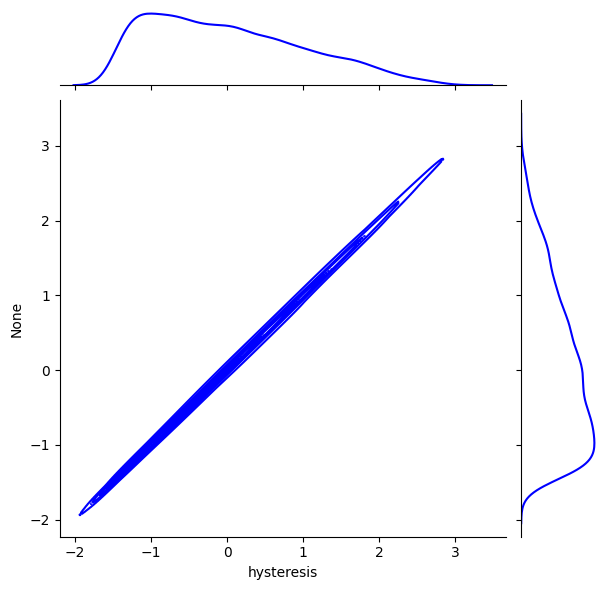

In [16]:
sns.jointplot(x = y_test, y = y_pred_bad, kind = 'kde', color = 'blue')

## Predictions With Grid Search

In [17]:
param_grid = {
    'iterations' : [50, 100],
    'learning_rate' : [0.01, 0.1],
    'depth' : [4, 6, 8],
    'l2_leaf_reg' : [1, 3, 5],
    'border_count' : [32, 64, 128]
}

In [18]:
grid_search = GridSearchCV(estimator = CatBoostRegressor(), 
                           param_grid = param_grid, 
                           cv = 3)

In [19]:
grid_search.fit(X_train, y_train)

0:	learn: 0.9939153	total: 4.01ms	remaining: 196ms
1:	learn: 0.9858644	total: 5.64ms	remaining: 135ms
2:	learn: 0.9783041	total: 8.02ms	remaining: 126ms
3:	learn: 0.9704329	total: 9.69ms	remaining: 111ms
4:	learn: 0.9629596	total: 10.7ms	remaining: 95.9ms
5:	learn: 0.9552336	total: 11.7ms	remaining: 85.7ms
6:	learn: 0.9478382	total: 12.7ms	remaining: 77.8ms
7:	learn: 0.9403029	total: 13.6ms	remaining: 71.6ms
8:	learn: 0.9330222	total: 14.6ms	remaining: 66.6ms
9:	learn: 0.9256534	total: 15.6ms	remaining: 62.4ms
10:	learn: 0.9183381	total: 16.5ms	remaining: 58.6ms
11:	learn: 0.9111431	total: 17.6ms	remaining: 55.8ms
12:	learn: 0.9039915	total: 18.8ms	remaining: 53.4ms
13:	learn: 0.8970114	total: 19.8ms	remaining: 50.8ms
14:	learn: 0.8900590	total: 20.8ms	remaining: 48.5ms
15:	learn: 0.8831031	total: 21.9ms	remaining: 46.5ms
16:	learn: 0.8761337	total: 22.9ms	remaining: 44.5ms
17:	learn: 0.8693254	total: 23.9ms	remaining: 42.5ms
18:	learn: 0.8625140	total: 25.3ms	remaining: 41.3ms
19:	lea

,estimator,<catboost.cor...x7fa21a5c8e10>
,param_grid,"{'border_count': [32, 64, ...], 'depth': [4, 6, ...], 'iterations': [50, 100], 'l2_leaf_reg': [1, 3, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [20]:
grid_search.best_params_

{'border_count': 128,
 'depth': 8,
 'iterations': 100,
 'l2_leaf_reg': 1,
 'learning_rate': 0.1}

In [21]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [22]:
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred)}")

Coefficient of determination: 0.9945244229876843
Mean squared error: 0.005562267499735515
Mean absolute percentage error: 0.3273185296184644


(-2.0, 3.5)

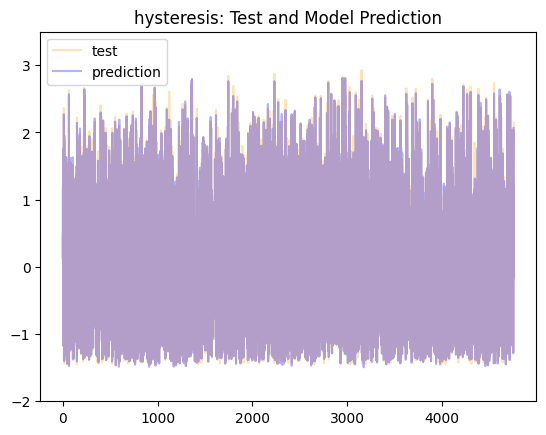

In [23]:
plt.plot(y_test, alpha = 0.3, color = 'orange', label = 'test')
plt.plot(y_pred, alpha = 0.3, color = 'blue', label = 'prediction')
plt.legend()
plt.title(f"{variable}: Test and Model Prediction")
plt.ylim(-2, 3.5)

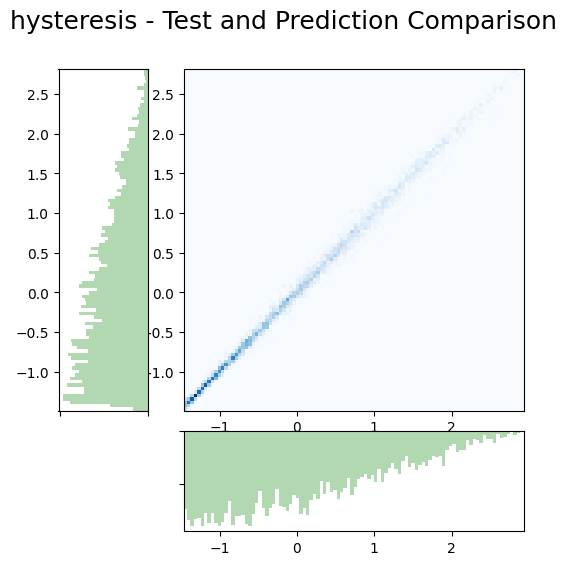

In [24]:
combinedHist(variable, y_test, y_pred)

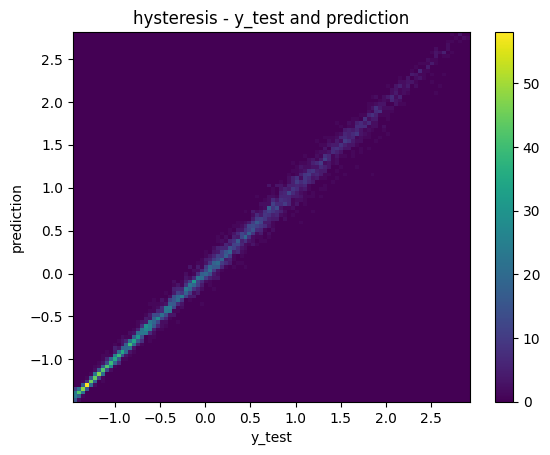

In [25]:
hist2d(variable, y_test, y_pred)

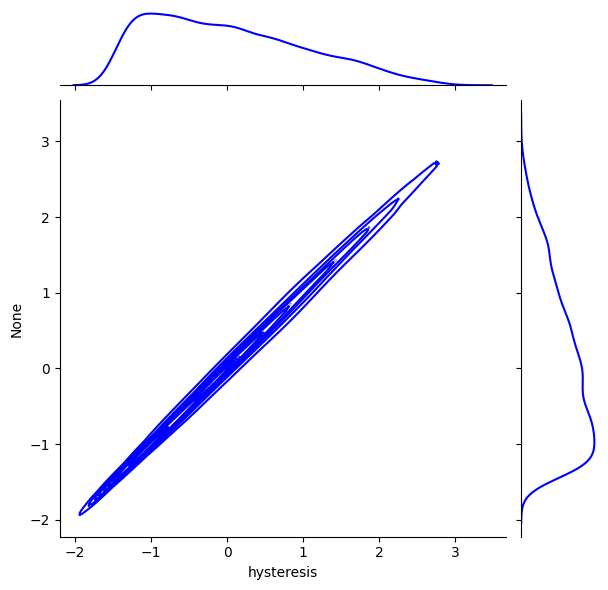

In [26]:
sns.jointplot(x = y_test, y = y_pred, kind = 'kde', color = 'blue')